# 🎬 GenAI × Drug Discovery — Module 0.1 — Chem basics
  
You’ll learn the *minimum chemistry intuition* you need to understand molecules in drug discovery:

- **Atoms & bonds** (why molecules have shapes)
- **Tautomers** (same atoms, different connectivity)
- **Stereochemistry** (3D “left/right-handed” versions)
- **Protonation & pH** (why charge changes)
- **pKa** (the “switch point” for protonation)

> 🎯 Goal: By the end, you can look at a molecule drawing and confidently understand  
> what changes when pH changes, why stereochemistry matters, and what “tautomer” means.

## 0) Setup
We’ll use **RDKit** just to *draw molecules* and show you the concepts visually.

If you ever see an error in installation below:  
- `Runtime > Restart runtime`, then re-run this cell.

In [ ]:
# Install RDKit in Colab
!pip -q install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 54.8 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
import math

# Nicer drawings
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.minFontSize = 14

##Helper: show molecules quickly

In [ ]:
def show(smiles_list, legends=None, mols_per_row=3, size=(280, 220)):
    mols = [Chem.MolFromSmiles(s) for s in smiles_list]
    if legends is None:
        legends = [""] * len(mols)
    return Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=size, legends=legends)

def show_one(smiles, legend=""):
    m = Chem.MolFromSmiles(smiles)
    return Draw.MolToImage(m, size=(320, 250), legend=legend)

# 1) Atoms: “the letters” of chemistry

**Atoms** are like LEGO pieces. Each type (C, N, O, Cl, …) has preferred ways of connecting.

In drug-like molecules, the most common atoms are:
- **C (carbon)**: the backbone / scaffold
- **H (hydrogen)**: fills empty spots (often omitted in drawings)
- **N (nitrogen)** & **O (oxygen)**: frequently control *polarity* and *charge*
- **S, F, Cl, Br**: can tune potency and properties

✅ **Big intuition**:  
Atoms differ mainly by how many connections they like to make and how strongly they pull electrons.

### Common elements in drug-like molecules
Let’s visualize a few simple molecules.

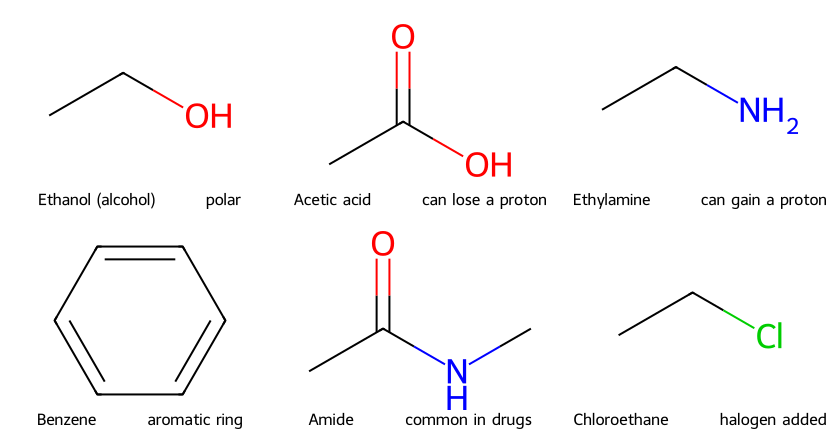

In [ ]:
examples = [
    ("CCO", "Ethanol (alcohol) — polar"),
    ("CC(=O)O", "Acetic acid — can lose a proton"),
    ("CCN", "Ethylamine — can gain a proton"),
    ("c1ccccc1", "Benzene — aromatic ring"),
    ("CC(=O)NC", "Amide — common in drugs"),
    ("CCCl", "Chloroethane — halogen added"),
]
show([s for s,_ in examples], legends=[lab for _,lab in examples], mols_per_row=3)

# 2) Bonds: “the connectors”

A **bond** is a connection between atoms.

Common bond types you’ll see:
- **Single bond** (—): flexible rotation (often)
- **Double bond** (=): more rigid
- **Triple bond** (≡): linear and rigid
- **Aromatic bonds** (ring with alternating character): special stability

✅ **Big intuition**:
- Bond type affects **shape** and **flexibility**.
- Shape affects how well a molecule fits a protein pocket (like a key in a lock).

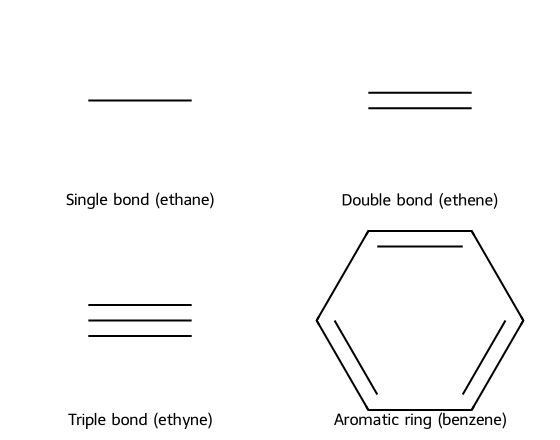

In [ ]:
bond_examples = [
    ("CC", "Single bond (ethane)"),
    ("C=C", "Double bond (ethene)"),
    ("C#C", "Triple bond (ethyne)"),
    ("c1ccccc1", "Aromatic ring (benzene)"),
]
show([s for s,_ in bond_examples], legends=[lab for _,lab in bond_examples], mols_per_row=2)

### Quick demo: flexibility (single bond rotation)
Ethanol and dimethyl ether have the same formula (**C2H6O**) but different connectivity → different properties.

This is a good moment to explain **isomers**:
- Same atoms
- Different arrangement → different behavior

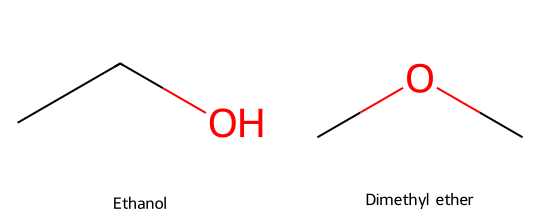

In [ ]:
same_formula = [
    ("CCO", "Ethanol"),
    ("COC", "Dimethyl ether"),
]
show([s for s,_ in same_formula], legends=[lab for _,lab in same_formula], mols_per_row=2)

# 3) Tautomers: “same atoms, different bonding”

A **tautomer** is a pair (or set) of structures that:
- have the **same atoms**
- but differ in **where a hydrogen sits** and **where double bonds are**

Think of it like a *molecule that can “shift” internally*.

### Why do we care in drug discovery?
Because a protein might bind **one tautomer more strongly** than another.

✅ **Big intuition**:  
Tautomer = *alternative internal wiring* that can switch in solution.

### Classic example: keto–enol tautomerism
Acetylacetone has a well-known keto/enol equilibrium.

Below is a *toy example* illustrating the idea:  
**2-pyridone ↔ 2-hydroxypyridine** (common textbook tautomer pair).

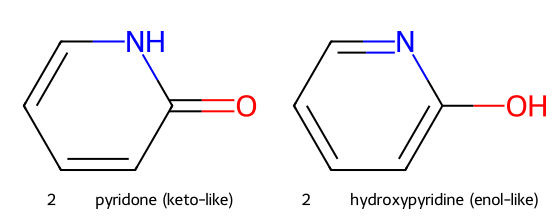

In [ ]:
tautomers = [
    ("O=c1cccc[nH]1", "2‑pyridone (keto-like)"),
    ("Oc1ccccn1", "2‑hydroxypyridine (enol-like)"),
]
show([s for s,_ in tautomers], legends=[lab for _,lab in tautomers], mols_per_row=2)

- It’s not “two different molecules in a bottle”; it’s often **an equilibrium** (a mixture that interconverts).
- The dominant tautomer depends on **solvent, pH, and functional groups**.
- In datasets, the “same compound” may appear with different tautomer SMILES — this can confuse ML models.

# 4) Stereochemistry: “3D matters”

Stereochemistry is about **3D arrangement**.

Two molecules can have:
- the **same atoms**
- the **same connections**
- but be *mirror images* or have different 3D orientation

These are **stereoisomers**.

### Why it matters (huge in pharma)
Proteins are 3D.  
So stereochemistry can change:
- potency (stronger/weaker binding)
- side effects
- metabolism

✅ **Big intuition**:  
Stereochemistry can make a drug helpful vs harmful.

### Example 1: Mirror-image molecules (enantiomers)
These often behave differently in the body.

We’ll show a simple chiral molecule: **lactic acid**.

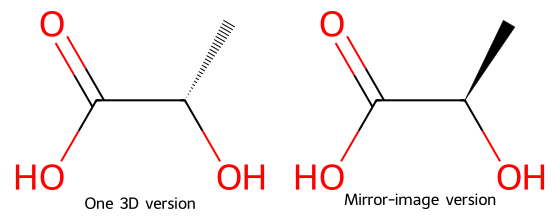

In [ ]:
# Lactic acid: chiral center at the middle carbon
stereo = [
    ("C[C@H](O)C(=O)O", "One 3D version"),
    ("C[C@@H](O)C(=O)O", "Mirror-image version"),
]

show([s for s,_ in stereo], legends=[lab for _,lab in stereo], mols_per_row=2)

### Example 2: “Same side vs opposite side” (cis/trans or E/Z)
Double bonds restrict rotation, so groups can be arranged differently.

We’ll show **2-butene**:
- **cis (Z)**: groups on same side
- **trans (E)**: groups on opposite sides

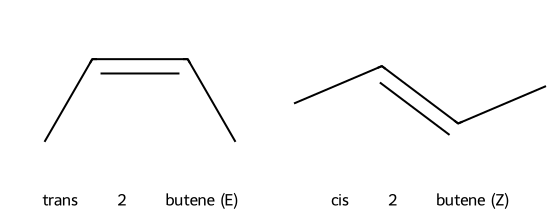

In [ ]:
ez = [
    ("C/C=C\\C", "trans‑2‑butene (E)"),
    ("C/C=C/C", "cis‑2‑butene (Z)"),
]
show([s for s,_ in ez], legends=[lab for _,lab in ez], mols_per_row=2)

- Many datasets **ignore** stereochemistry or have it inconsistently encoded.
- A model that treats stereoisomers as identical may fail in real drug design.

# 5) Protonation & pH: “why charge changes”

Many molecules can **gain** or **lose** a proton (H⁺).  
That changes the molecule’s **charge**, which strongly affects:
- solubility (can it dissolve?)
- permeability (can it cross membranes?)
- binding (electrostatics in a pocket)

### A simple rule of thumb
- **Acids** tend to **lose** H⁺ → become **negative**
- **Bases** tend to **gain** H⁺ → become **positive**

✅ **Big intuition**:  
pH is like a “knob” that changes molecular charge.

### Visual example: acetic acid (acid) vs ethylamine (base)
- Acetic acid can become **acetate (−1)** when it loses a proton.
- Ethylamine can become **ethylammonium (+1)** when it gains a proton.

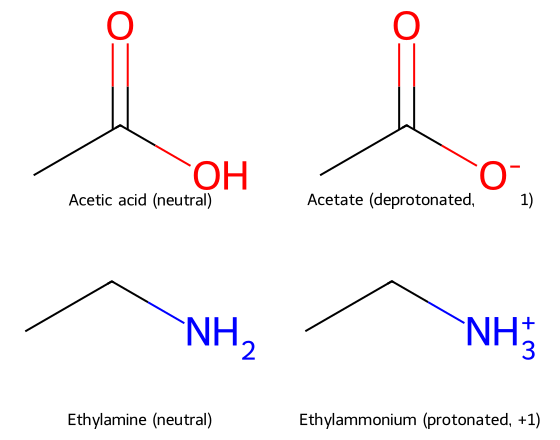

In [ ]:
protonation = [
    ("CC(=O)O", "Acetic acid (neutral)"),
    ("CC(=O)[O-]", "Acetate (deprotonated, −1)"),
    ("CCN", "Ethylamine (neutral)"),
    ("CC[NH3+]", "Ethylammonium (protonated, +1)"),
]
show([s for s,_ in protonation], legends=[lab for _,lab in protonation], mols_per_row=2)

### pH in the body
Different places in the body have different typical pH ranges:
- Stomach: very acidic (low pH)
- Blood: around neutral (~7.4)
- Some cell compartments: slightly acidic

So the “same drug” can change charge as it moves around.

# 6) pKa: “the switch point”

**pKa** is the pH where **50%** of a group is protonated and **50%** is deprotonated.

You can treat pKa like a *thermostat setting*:
- If pH is far **below** pKa → tends to be **protonated**
- If pH is far **above** pKa → tends to be **deprotonated**

### Henderson–Hasselbalch
For an acid:  
\[
\text{fraction deprotonated} = \frac{1}{1 + 10^{(\mathrm{p}K_a-\mathrm{pH})}}
\]

We’ll use it to build intuition with a simple plot.

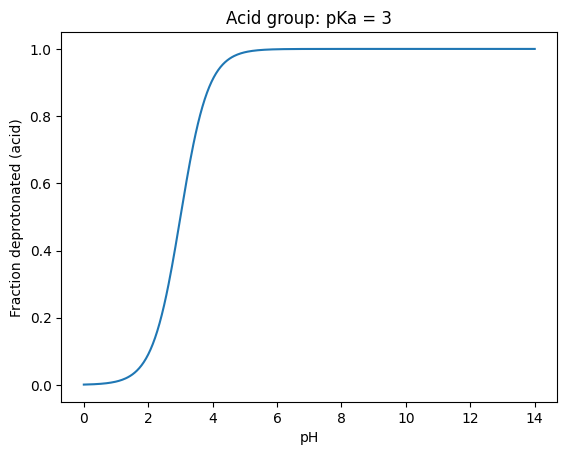

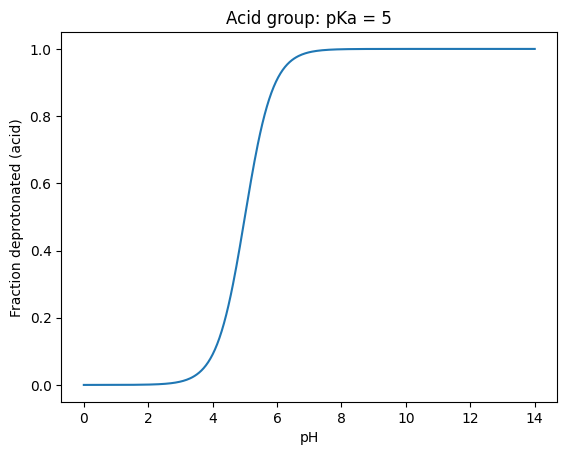

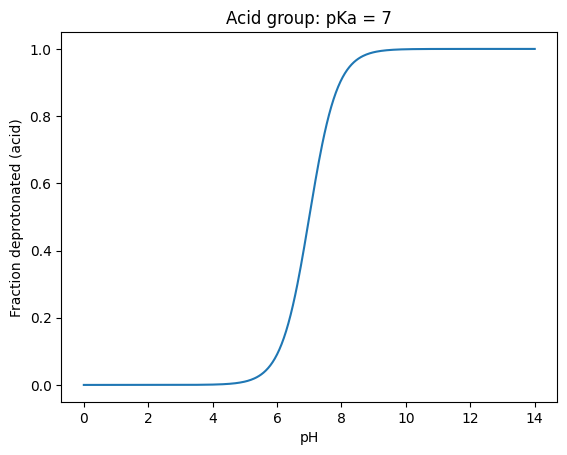

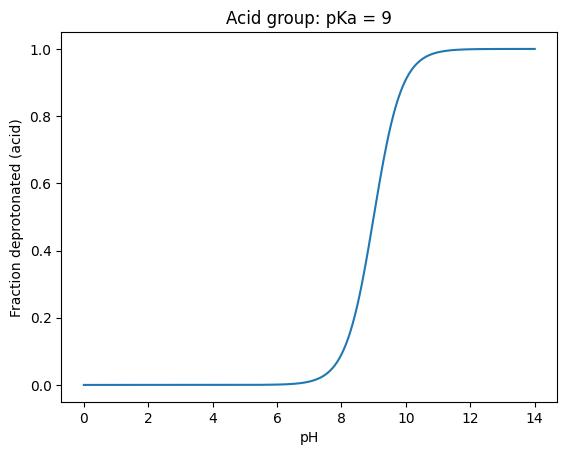

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def frac_deprot_acid(pH, pKa):
    return 1 / (1 + 10**(pKa - pH))

pH = np.linspace(0, 14, 400)
pKa_values = [3, 5, 7, 9]

for pKa in pKa_values:
    plt.figure()
    plt.plot(pH, frac_deprot_acid(pH, pKa))
    plt.xlabel("pH")
    plt.ylabel("Fraction deprotonated (acid)")
    plt.title(f"Acid group: pKa = {pKa}")
    plt.ylim(-0.05, 1.05)
    plt.show()

- At **pH = pKa**, you’re at ~0.5 (half charged)
- Move pH by **1 unit** → about **10×** change in the ratio
- That’s why small pH changes can strongly shift charge

✅ **Big intuition**:  
pKa tells you where a molecule “flips” between charged and uncharged forms.

# 7) Mini recap
If you only remember 5 things:

1) **Atoms** are the building blocks (C, N, O dominate drug-like molecules).  
2) **Bond types** control flexibility and shape.  
3) **Tautomers** are structures that interconvert by moving H and double bonds.  
4) **Stereochemistry** means 3D versions can behave like different drugs.  
5) **Protonation/pKa** determines charge at a given pH → affects solubility, permeability, binding.



# 8) I will Explain “Chem basics” (for GenAI drug discovery)

- **Functional groups**: alcohol, amine, carboxylic acid, amide, aromatic ring  
  (these strongly influence solubility and binding)
- **Polarity & H-bonding**: donors vs acceptors (why O/N matter)
- **Lipophilicity (logP/logD)**: “oil vs water” preference (very drug-relevant)
- **Molecular weight & PSA**: quick property intuition
- **Resonance & aromaticity**: why some rings are “special”
- **Intermolecular forces**: ionic, H-bonds, hydrophobic effects
- **Salt forms**: common in drug formulation (protonated/deprotonated packaged as a salt)

